In [2]:
##Importing all python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##Importing csv File
df=pd.read_csv(r'C:\Users\DELL\Documents\accident_data.csv',encoding='unicode escape')

In [4]:
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [5]:
df.shape

(660679, 14)

In [6]:
df.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [7]:
##Checking Null Values
df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [8]:
##Detecting data_types
df.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [9]:
##filling the null values using mean function
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)
df.isnull().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_85836\298060286.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_85836\298060286.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [10]:
##Replace all null values with the appropriate values..
m_df=df.fillna({'Urban_or_Rural_Area':'Urban','Weather_Conditions':'Other','Road_Type':'One way street','Road_Surface_Conditions':'Wet'})
m_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [11]:
##Number of people casualities
df['Number_of_Casualties'].value_counts().head()

Number_of_Casualties
1    504041
2    107971
3     30776
4     11156
5      4123
Name: count, dtype: int64

In [12]:
df.describe

<bound method NDFrame.describe of                 Index Accident_Severity Accident Date   Latitude  \
0       200701BS64157           Serious    05-06-2019  51.506187   
1       200701BS65737           Serious    02-07-2019  51.495029   
2       200701BS66127           Serious    26-08-2019  51.517715   
3       200701BS66128           Serious    16-08-2019  51.495478   
4       200701BS66837            Slight    03-09-2019  51.488576   
...               ...               ...           ...        ...   
660674  201091NM01760            Slight    18-02-2022  57.374005   
660675  201091NM01881            Slight    21-02-2022  57.232273   
660676  201091NM01935            Slight    23-02-2022  57.585044   
660677  201091NM01964           Serious    23-02-2022  57.214898   
660678  201091NM02142           Serious    28-02-2022  57.575210   

                   Light_Conditions           District Area  Longitude  \
0             Darkness - lights lit  Kensington and Chelsea  -0.209082   
1

In [13]:
##Determining correlation 
df[['Latitude','Longitude','Number_of_Casualties','Number_of_Vehicles']].corr()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
Latitude,1.000000,-0.398113,0.032201,-0.040028
Longitude,-0.398113,1.000000,-0.040406,0.014725
Number_of_Casualties,0.032201,-0.040406,1.000000,0.228889
Number_of_Vehicles,-0.040028,0.014725,0.228889,1.000000


<Axes: >

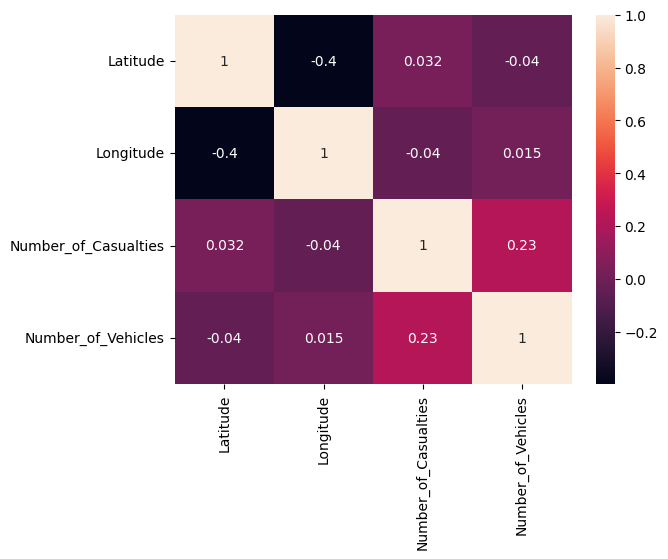

In [14]:
##Heatmap 
sns.heatmap(df[['Latitude','Longitude','Number_of_Casualties','Number_of_Vehicles']].corr(),annot=True)

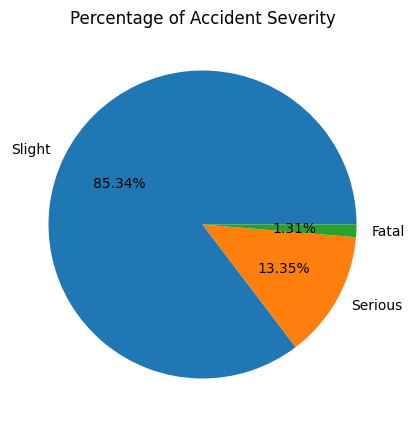

In [47]:
##Percentage of Accident_Severity
plt.figure(figsize=(5,5))
plt.pie(df.Accident_Severity.value_counts(),autopct='%0.2f%%',labels=['Slight','Serious','Fatal'])
plt.title('Percentage of Accident Severity')
plt.show()

In [32]:
##Grouping 
df_2=df.groupby(['Accident_Severity','Vehicle_Type'])['District Area']
df_2

In [34]:
pd.DataFrame(df_2.first())

District Area
Accident_Severity Vehicle_Type                                                 
Fatal             Agricultural vehicle                                 Tameside
                  Bus or coach (17 or more pass seats)   Kensington and Chelsea
                  Car                                    Kensington and Chelsea
                  Goods 7.5 tonnes mgw and over                           Brent
                  Goods over 3.5t. and under 7.5t                          Wyre
                  Minibus (8 - 16 passenger seats)                      Salford
                  Motorcycle 125cc and under             Hammersmith and Fulham
                  Motorcycle 50cc and under                             Lambeth
                  Motorcycle over 125cc and up to 500cc                  Bexley
                  Motorcycle over 500cc                          City of London
                  Other vehicle                                  Waltham Forest
                  Pedal cycle                                           Fenland
                  Taxi/Private hire car                               Redbridge
                  Van / Goods 3.5 tonnes mgw or under    Hammersmith and Fulham
Serious           Agricultural vehicle                            Tower Hamlets
                  Bus or coach (17 or more pass seats)   Kensington and Chelsea
                  Car                                    Kensington and Chelsea
                  Goods 7.5 tonnes mgw and over          Kensington and Chelsea
                  Goods over 3.5t. and under 7.5t        Kensington and Chelsea
                  Minibus (8 - 16 passenger seats)                  Westminster
                  Motorcycle 125cc and under             Kensington and Chelsea
                  Motorcycle 50cc and under              Kensington and Chelsea
                  Motorcycle over 125cc and up to 500cc             Westminster
                  Motorcycle over 500cc                  Hammersmith and Fulham
                  Other vehicle                                     Westminster
                  Pedal cycle                                           Hackney
                  Taxi/Private hire car                  Kensington and Chelsea
                  Van / Goods 3.5 tonnes mgw or under    Kensington and Chelsea
Slight            Agricultural vehicle                                  Hackney
                  Bus or coach (17 or more pass seats)   Kensington and Chelsea
                  Car                                    Kensington and Chelsea
                  Data missing or out of range                        Gateshead
                  Goods 7.5 tonnes mgw and over          Kensington and Chelsea
                  Goods over 3.5t. and under 7.5t        Hammersmith and Fulham
                  Minibus (8 - 16 passenger seats)       Kensington and Chelsea
                  Motorcycle 125cc and under             Kensington and Chelsea
                  Motorcycle 50cc and under              Kensington and Chelsea
                  Motorcycle over 125cc and up to 500cc  Kensington and Chelsea
                  Motorcycle over 500cc                  Kensington and Chelsea
                  Other vehicle                          Kensington and Chelsea
                  Pedal cycle                                       Westminster
                  Ridden horse                                     West Lothian
                  Taxi/Private hire car                  Kensington and Chelsea
                  Van / Goods 3.5 tonnes mgw or under    Kensington and Chelsea

In [36]:
df_3=df.groupby(['Urban_or_Rural_Area','Road_Type'])['Accident_Severity']

In [42]:
pd.DataFrame(df_3.first())

Accident_Severity
Urban_or_Rural_Area Road_Type                           
Rural               Dual carriageway              Slight
                    One way street                Slight
                    Roundabout                    Slight
                    Single carriageway            Slight
                    Slip road                     Slight
Unallocated         Dual carriageway              Slight
                    Roundabout                    Slight
                    Single carriageway            Slight
Urban               Dual carriageway             Serious
                    One way street                Slight
                    Roundabout                    Slight
                    Single carriageway           Serious
                    Slip road                     Slight

In [43]:
df_4=df.groupby(['Light_Conditions','Weather_Conditions'])['Number_of_Casualties']

In [44]:
pd.DataFrame(df_4.first())

Number_of_Casualties
Light_Conditions            Weather_Conditions                         
Darkness - lighting unknown Fine + high winds                         1
                            Fine no high winds                        1
                            Fog or mist                               1
                            Other                                     1
                            Raining + high winds                      1
                            Raining no high winds                     1
                            Snowing + high winds                      2
                            Snowing no high winds                     1
Darkness - lights lit       Fine + high winds                         1
                            Fine no high winds                        1
                            Fog or mist                               1
                            Other                                     3
                            Raining + high winds                      1
                            Raining no high winds                     1
                            Snowing + high winds                      1
                            Snowing no high winds                     1
Darkness - lights unlit     Fine + high winds                         1
                            Fine no high winds                        1
                            Fog or mist                               2
                            Other                                     1
                            Raining + high winds                      1
                            Raining no high winds                     1
                            Snowing + high winds                      1
                            Snowing no high winds                     2
Darkness - no lighting      Fine + high winds                         1
                            Fine no high winds                        1
                            Fog or mist                               1
                            Other                                     1
                            Raining + high winds                      2
                            Raining no high winds                     1
                            Snowing + high winds                      1
                            Snowing no high winds                     1
Daylight                    Fine + high winds                         1
                            Fine no high winds                        1
                            Fog or mist                               2
                            Other                                     1
                            Raining + high winds                      1
                            Raining no high winds                     1
                            Snowing + high winds                      4
                            Snowing no high winds                     1

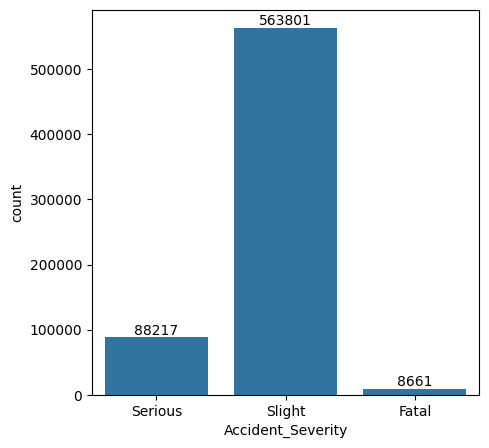

In [45]:
plt.figure(figsize=(5,5))
m=sns.countplot(x='Accident_Severity',data=df)
for bars in m.containers:
    m.bar_label(bars)
plt.show()

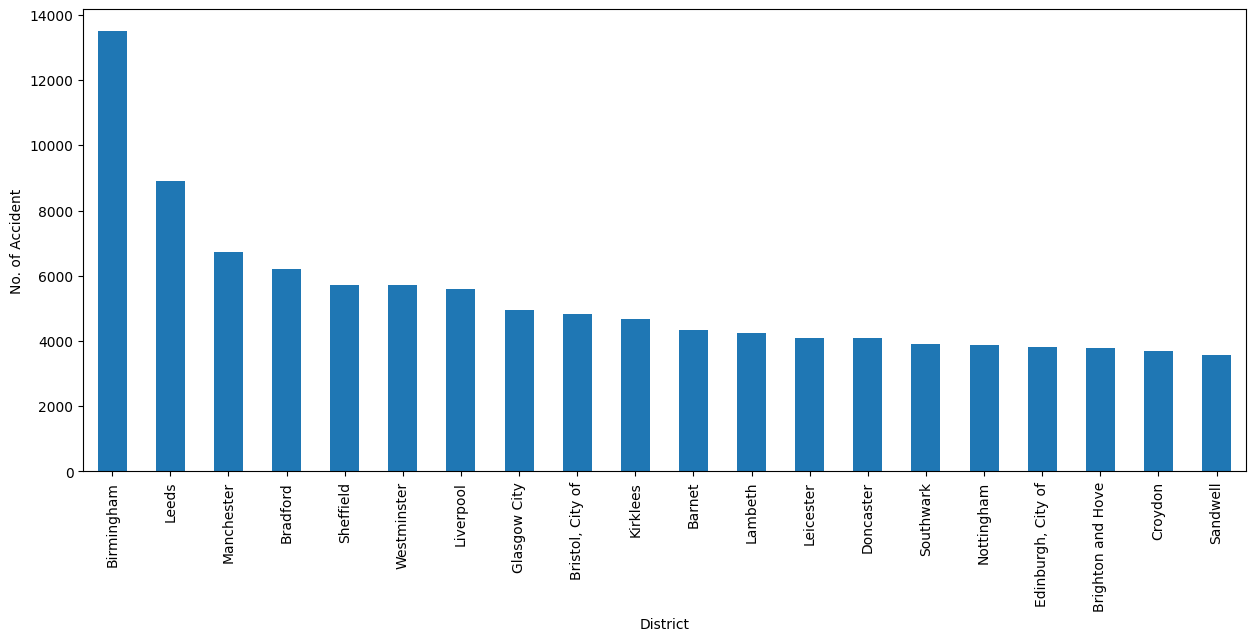

In [60]:
##Number of Accidents in 20 Districts
plt.figure(figsize=(15,6))
district_group=df.groupby('District Area')['District Area'].count().sort_values(ascending=False).head(20)
district_group.plot(kind='bar')
plt.ylabel('No. of Accident')
plt.xlabel('District')
plt.show()

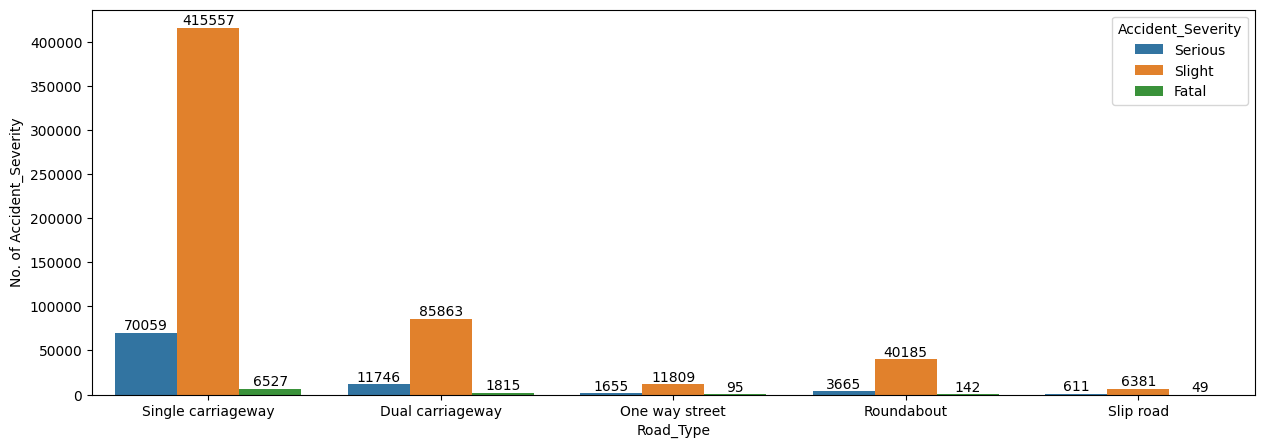

In [70]:
#Accident_Severity as per Road_Type
plt.figure(figsize=(15,5))
m=sns.countplot(x='Road_Type',hue='Accident_Severity',data=df)
for bars in m.containers:
    m.bar_label(bars)
plt.ylabel('No. of Accident_Severity')
plt.show()

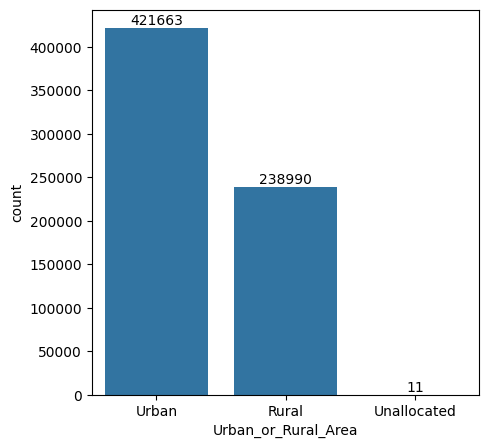

In [78]:
#No. of accident in Urban and Rural Areas..
plt.figure(figsize=(5,5))
n=sns.countplot(x='Urban_or_Rural_Area',data=df)
for bars in n.containers:
    n.bar_label(bars)
plt.show()

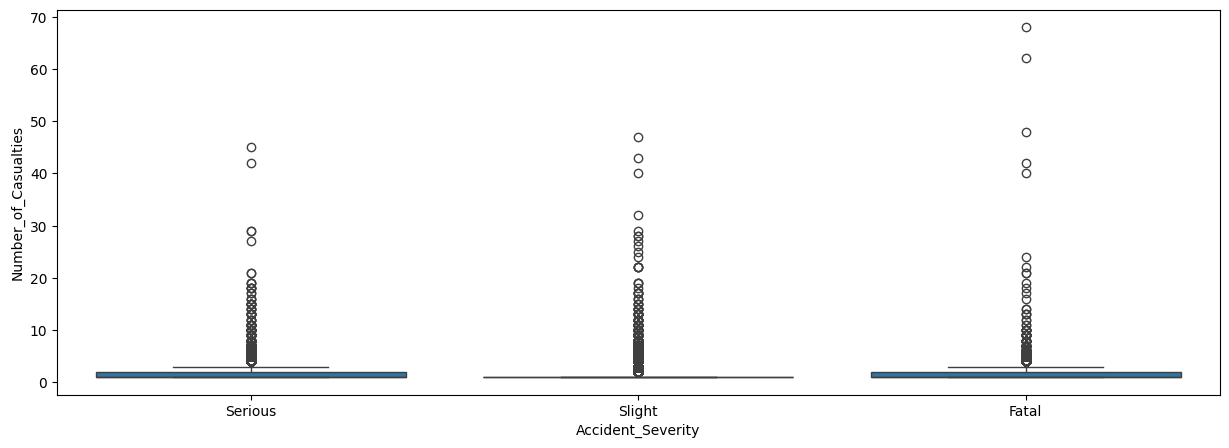

In [85]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Accident_Severity',y='Number_of_Casualties',data=df)
plt.show()